In [318]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [319]:
mp = nltk.corpus.gutenberg.words("milton-paradise.txt")
mp

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [320]:
# The chart will work if I pick 1000 sentences 
text_Sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')[:1000]
print(text_Sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [321]:
sw = set(nltk.corpus.stopwords.words('english'))
for sentence in text_Sentences:
    new_filtered_list = [word for word in sentence if word.lower() not in sw and word.isalnum() ]
    print(new_filtered_list)

['Paradise', 'Lost', 'John', 'Milton', '1667']
['Book']
['Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme']
['chiefly', 'thou', 'Spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'Instruct', 'thou', 'know', 'st', 'thou', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'st', 'brooding', 'vast', 'Abyss', 'mad', 'st', 'pre

In [322]:
#tokenized_mp = word_tokenize(' '.join(new_filtered_list))
#tokenized_mp

In [323]:
# I choose lemmatization because its more accurate.
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in new_filtered_list]
lemmatized_word_counts = Counter(lemmatized_words)
common_words = lemmatized_word_counts.most_common(20)
print(common_words)

[('wing', 4), ('soon', 2), ('forth', 2), ('air', 2), ('ground', 2), ('part', 2), ('branch', 2), ('others', 2), ('whose', 2), ('mean', 1), ('tepid', 1), ('cave', 1), ('fen', 1), ('shore', 1), ('brood', 1), ('numerous', 1), ('hatch', 1), ('egg', 1), ('bursting', 1), ('kindly', 1)]


In [324]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

[4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


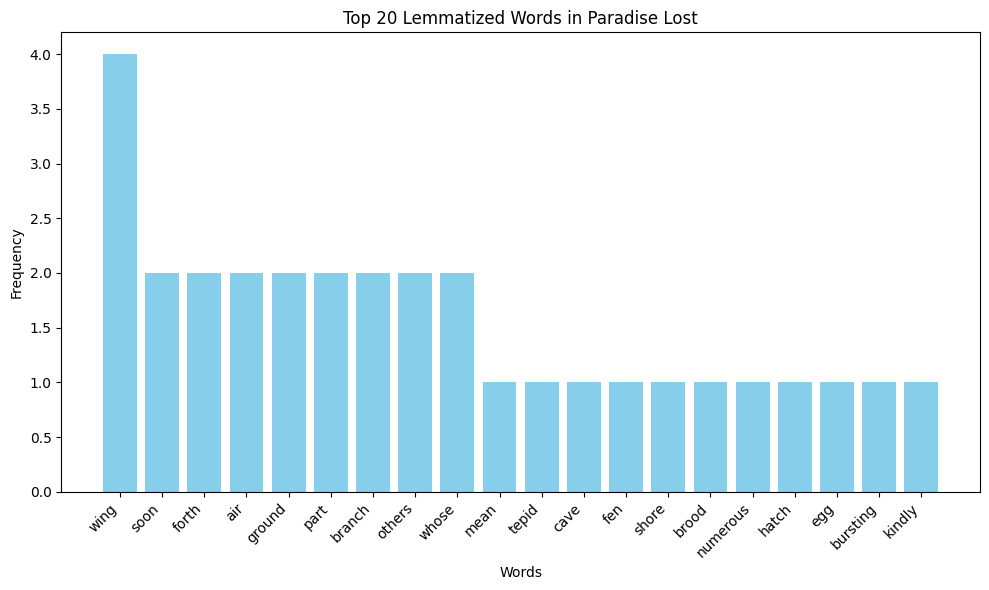

In [325]:
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]
print(counts)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Lemmatized Words in Paradise Lost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [326]:
sentences = tokenized_mp[:100]
print(sentences)

['But', 'his', 'doom', 'Reserved', 'him', 'to', 'more', 'wrath', 'for', 'now', 'the', 'thought', 'Both', 'of', 'lost', 'happiness', 'and', 'lasting', 'pain', 'Torments', 'him', 'round', 'he', 'throws', 'his', 'baleful', 'eyes', 'That', 'witnessed', 'huge', 'affliction', 'and', 'dismay', 'Mixed', 'with', 'obdurate', 'pride', 'and', 'steadfast', 'hate']


In [327]:
    # I created a function that look at the paridaise text. 
    # Iterate through the sentences and look at the scores 
    # of those sentences. Then using the dataframe and sorting the values
def mp_sentiment_analyzer(TEXT:str) ->pd.DataFrame:
    analyzer = SentimentIntensityAnalyzer()
    sp = nltk.corpus.gutenberg.sents("milton-paradise.txt")
    sentiments = []


    for x in sp:
        mp_string = ''
        for i in x:
            mp_string = mp_string+ ' ' +i
    
        sentiment = analyzer.polarity_scores(mp_string)
        compound = sentiment ['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        sentiments.append({
        "text": x,
        "compound": compound,
        "positive": pos,
        "negative": neg,
        "neutral": neu  
        })

    df = pd.DataFrame(sentiments)
    pos =[df.sort_values('positive', ascending=False)['text'][:5]]
    neg =[df.sort_values('negative', ascending=False)['text'][:5]]
    neu =[df.sort_values('neutral', ascending=False)['text'][:5]]

    return({'positive': pos,
            'negative' : neg,
            'neutral' : neu})

In [328]:
# Using this function help se what is positive,
# negative, and neutral. It works just fine.
mp_sentiment_analyzer('milton-paradise.txt')


{'positive': [605                                       [O, friends, !]
  1441                                       [O, Heaven, !]
  828                                        [O, Heaven, !]
  908                                       [O, Friends, !]
  1233    [She, fair, ,, divinely, fair, ,, fit, love, f...
  Name: text, dtype: object],
 'negative': [512           [O, Hell, !]
  153                [No, !]
  1689             [Alas, !]
  478     [Me, miserable, !]
  175         [Sad, cure, !]
  Name: text, dtype: object],
 'neutral': [1850                                   [[, The, End, ]]
  1236    [and, toward, Eve, Addressed, his, way, :, not...
  1214    [So, spake, the, patriarch, of, mankind, ;, bu...
  327                                     [whom, follow, ?]
  326     [Thou, art, my, father, ,, thou, my, author, ,...
  Name: text, dtype: object]}